In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from random import randint

In [2]:
mnist=keras.datasets.mnist
(x_Train,y_Train), (x_Test, y_Test) = mnist.load_data()

INDEX: 39075
LABEL: 0


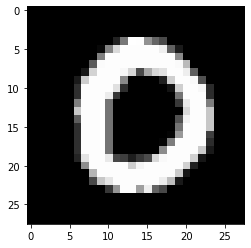

In [3]:
index=randint(0,len(x_Train)-1)
print(f'INDEX: {index}')
print(f'LABEL: {y_Train[index]}')
plt.imshow(x_Train[index],cmap='gray')

In [4]:
shape=x_Train.shape
x_Train=x_Train.reshape(shape[0],shape[1],shape[2],1)
shape=x_Test.shape
x_Test=x_Test.reshape(shape[0],shape[1],shape[2],1)

In [5]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.995):
            print("\nReached 99.5% accuracy so stopping training!")
            self.model.stop_training = True

In [6]:
model = tf.keras.models.Sequential([ 
        tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(1024, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ]) 
# model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
#                                     tf.keras.layers.Dense(1024, activation=tf.nn.relu), 
#                                     tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [7]:
model.compile(optimizer='adam', 
                  loss='sparse_categorical_crossentropy', 
                  metrics=['accuracy']) 
# model.summary()

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 1024)              1

In [9]:
model.fit(x_Train/255,y_Train,validation_split=0.1, epochs=8) #callbacks=[myCallback()])

Epoch 1/8
1688/1688 [==============================] - 21s 6ms/step - loss: 0.1082 - accuracy: 0.9666 - val_loss: 0.0409 - val_accuracy: 0.9898
Epoch 2/8
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0362 - accuracy: 0.9886 - val_loss: 0.0329 - val_accuracy: 0.9902
Epoch 3/8
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0237 - accuracy: 0.9926 - val_loss: 0.0326 - val_accuracy: 0.9910
Epoch 4/8
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0195 - accuracy: 0.9937 - val_loss: 0.0365 - val_accuracy: 0.9915
Epoch 5/8
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0138 - accuracy: 0.9952 - val_loss: 0.0332 - val_accuracy: 0.9920
Epoch 6/8
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0096 - accuracy: 0.9967 - val_loss: 0.0522 - val_accuracy: 0.9907
Epoch 7/8
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0090 - accuracy: 0.9970 - val_loss: 0.0441 - val_accuracy: 0.993

In [10]:
model.evaluate(x_Test/255,y_Test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0482 - accuracy: 0.9886


[0.048219285905361176, 0.9886000156402588]

In [11]:
model.save("models\\mnist")

INFO:tensorflow:Assets written to: models\mnist\assets


In [12]:
import cv2
# img=cv2.imread('images\\cell04.png')
# img=cv2.resize(img,(28,28),interpolation= cv2.INTER_LINEAR)
# plt.imshow(x_Test[0],cmap='gray')
print(len(x_Test[0][0]))
print(x_Test.shape)
# for i in range(len(x_Test[0])):
#     for j in range(len(x_Test[0][i])):
#         print(x_Test[0][i][j]/255,end=" ")
#     print()
print()
# img.shape
# img=img.reshape(28,28,1)
# model.predict(img)

28
(10000, 28, 28, 1)

